In [1]:
import pandas as pd
import seaborn as sns
import scipy

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

print("Using pandas %s version" % pd.__version__)
print("Using seaborn %s version"% sns.__version__)
print("Using scipy %s version" % scipy.__version__)

Using pandas 1.1.3 version
Using seaborn 0.11.0 version
Using scipy 1.5.2 version


In [2]:
fig1 = pd.read_table(r'C:\Projects\RecSys2020\results\figure1.txt',sep='\t',header=4)

fig1.head()

,Recommender,Full,Test
0,iMF (full),0.355007,0.660162
1,iMF (test),0.177550,0.684576
2,kNN (full/test),0.310464,0.659460
3,Normalized kNN (full),0.206560,0.642364
4,Normalized kNN (test),0.085848,0.671166


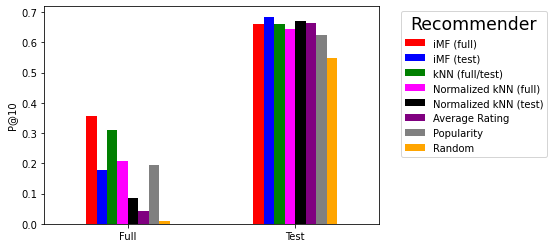

In [3]:
f1 = np.array(fig1)
df = pd.DataFrame(index=['Full', 'Test'])
for i,r in enumerate(fig1.Recommender):
    df[r] = f1[i][1:]
    
df.plot(kind='bar', color=('red','blue','green','magenta', 'black', 'purple', 'grey', 'orange'),legend=None)
plt.ylabel('P@10')
plt.gca().xaxis.set_tick_params(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Recommender', title_fontsize='xx-large')


([<matplotlib.axis.XTick at 0x2900d94c148>,
 [Text(1, 0, 'Full'), Text(2, 0, 'Test')])

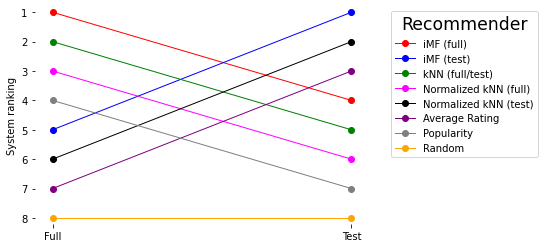

In [4]:
data = [list(a) for a in zip(fig1.Recommender, fig1.Full.rank(ascending=False),fig1.Test.rank(ascending=False))]

artists = []
for row, color in zip(data, ('red','blue','green','magenta', 'black', 'purple', 'grey', 'orange')):
    artists.append(plt.Line2D(xdata=[1,2], ydata=[row[1:]], lw=1, color=color, marker='o'))

fig, ax = plt.subplots()

for artist in artists:
    a = ax.add_artist(artist)
    
ax.set_ybound([0.8,8.2])
ax.set_xbound([0.94,2.06])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.gca().invert_yaxis()
plt.ylabel('System ranking')
plt.legend(artists, fig1.Recommender, bbox_to_anchor=(1.05, 1), loc='upper left', title='Recommender', title_fontsize='xx-large')

#plt.tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom=False,      # ticks along the bottom edge are off
#    top=False,         # ticks along the top edge are off
#    labelbottom=False) # labels along the bottom edge are off
plt.xticks([1,2], ['Full', 'Test'])

#plt.rcParams["figure.figsize"] = (2,6)


([<matplotlib.axis.XTick at 0x2900da09a48>,
 [Text(1, 0, 'Full'), Text(2, 0, 'Test')])

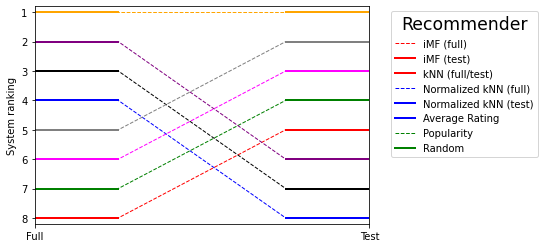

In [5]:
def energy_rank(data, marker_width=.5, color='blue'):
    y_data = np.repeat(data, 2)
    x_data = np.empty_like(y_data)
    x_data[0::2] = np.arange(1, len(data)+1) - (marker_width/2)
    x_data[1::2] = np.arange(1, len(data)+1) + (marker_width/2)
    lines = []
    lines.append(plt.Line2D(x_data, y_data, lw=1, linestyle='dashed', color=color))
    for x in range(0,len(data)*2, 2):
        lines.append(plt.Line2D(x_data[x:x+2], y_data[x:x+2], lw=2, linestyle='solid', color=color))
    return lines

data = [list(a) for a in zip(fig1.Full.rank(),fig1.Test.rank())]
#np.random.rand(8,2) * 4 # 4 lines with 8 datapoints from 0 - 4

artists = []
for row, color in zip(data, ('red','blue','green','magenta', 'black', 'purple', 'grey', 'orange')):
    artists.extend(energy_rank(row, color=color))
    #artists.append(plt.Line2D([data[0][0]], [data[0][1]], lw=1, linestyle='dashed', color=color))

fig, ax = plt.subplots()

for artist in artists:
    ax.add_artist(artist)
ax.set_ybound([0.8,8.2])
ax.set_xbound([1,2])

plt.gca().invert_yaxis()
plt.ylabel('System ranking')
plt.legend(artists, fig1.Recommender, bbox_to_anchor=(1.05, 1), loc='upper left', title='Recommender', title_fontsize='xx-large')

plt.xticks([1,2], ['Full', 'Test'])

#plt.tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom=False,      # ticks along the bottom edge are off
#    top=False,         # ticks along the top edge are off
#    labelbottom=False) # labels along the bottom edge are off